In [1]:
import numpy as np
import pandas as pd
import IPython.display as display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("huntington_data.csv")


In [3]:
df.head()

,Age,Gender,CAG_Repeats,Motor_Score,Cognitive_Score,Behavioral_Score,Family_History,Label
0,68,Male,19,4,93,78,0,Healthy
1,58,Male,33,34,56,74,1,Healthy
2,44,Female,18,86,16,7,0,Healthy
3,72,Female,49,92,46,25,0,Huntington
4,37,Female,31,74,22,50,1,Healthy


In [4]:
df.tail()

,Age,Gender,CAG_Repeats,Motor_Score,Cognitive_Score,Behavioral_Score,Family_History,Label
2795,58,Female,27,63,33,64,0,Healthy
2796,50,Male,23,32,45,16,0,Huntington
2797,76,Female,36,51,77,21,0,Healthy
2798,45,Female,40,88,3,97,1,Huntington
2799,66,Female,26,13,29,40,1,Huntington


In [5]:
df.shape

(2800, 8)

In [6]:
df.columns

Index(['Age', 'Gender', 'CAG_Repeats', 'Motor_Score', 'Cognitive_Score',
       'Behavioral_Score', 'Family_History', 'Label'],
      dtype='object')

In [7]:
#type for each columns in datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               2800 non-null   int64 
 1   Gender            2800 non-null   object
 2   CAG_Repeats       2800 non-null   int64 
 3   Motor_Score       2800 non-null   int64 
 4   Cognitive_Score   2800 non-null   int64 
 5   Behavioral_Score  2800 non-null   int64 
 6   Family_History    2800 non-null   int64 
 7   Label             2800 non-null   object
dtypes: int64(6), object(2)
memory usage: 175.1+ KB


In [8]:
df.describe()

,Age,CAG_Repeats,Motor_Score,Cognitive_Score,Behavioral_Score,Family_History
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,55.081429,32.530000,48.488571,48.845714,49.307143,0.464286
std,14.063926,10.142843,28.857311,28.143696,29.334039,0.498812
min,30.000000,15.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,24.000000,23.000000,25.000000,24.750000,0.000000
50%,55.000000,33.000000,48.000000,48.000000,48.500000,0.000000
75%,67.250000,41.000000,73.000000,72.000000,75.000000,1.000000
max,79.000000,49.000000,99.000000,99.000000,99.000000,1.000000


In [9]:
df

,Age,Gender,CAG_Repeats,Motor_Score,Cognitive_Score,Behavioral_Score,Family_History,Label
0,68,Male,19,4,93,78,0,Healthy
1,58,Male,33,34,56,74,1,Healthy
2,44,Female,18,86,16,7,0,Healthy
3,72,Female,49,92,46,25,0,Huntington
4,37,Female,31,74,22,50,1,Healthy
...,...,...,...,...,...,...,...,...
2795,58,Female,27,63,33,64,0,Healthy
2796,50,Male,23,32,45,16,0,Huntington
2797,76,Female,36,51,77,21,0,Healthy
2798,45,Female,40,88,3,97,1,Huntington


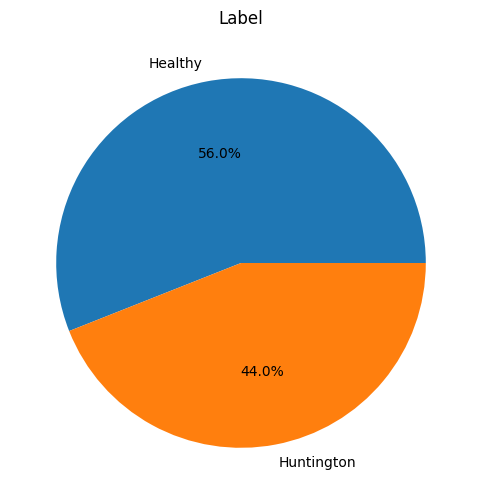

In [10]:
counts = df['Label'].value_counts().head(10)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title('Label')
plt.show()


In [11]:
df.columns

Index(['Age', 'Gender', 'CAG_Repeats', 'Motor_Score', 'Cognitive_Score',
       'Behavioral_Score', 'Family_History', 'Label'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [13]:
X = df[['Age', 'Gender', 'CAG_Repeats', 'Motor_Score', 'Cognitive_Score','Behavioral_Score', 'Family_History']]
y = df['Label']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
numeric_features = ['Age', 'CAG_Repeats', 'Motor_Score', 'Cognitive_Score','Behavioral_Score', 'Family_History']
categorical_features = ['Gender']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ])

In [20]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the SVC model pipeline
SVC_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', SVC())])

# Train the model
SVC_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = SVC_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

svc_score = int(accuracy * 100)

# Print results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.9428571428571428
Precision: 0.9420386409060626
Recall: 0.9410706604622062
F1 Score: 0.9415418341249544


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', KNeighborsClassifier())])  # Change the classifier here

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred =knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
knn_score=int(accuracy * 100)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9517857142857142
Precision: 0.9531620553359683
Recall: 0.9483244046455246
F1 Score: 0.9504780246234266


In [18]:
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Replace KNN with Perceptron
perceptron = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', Perceptron(max_iter=1000, tol=1e-3))])

# Train the model
perceptron.fit(X_train, y_train)

# Make predictions
y_pred = perceptron.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
per_score=int(accuracy * 100)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.6446428571428572
Precision: 0.796975546975547
Recall: 0.584216426178652
F1 Score: 0.52731390954322


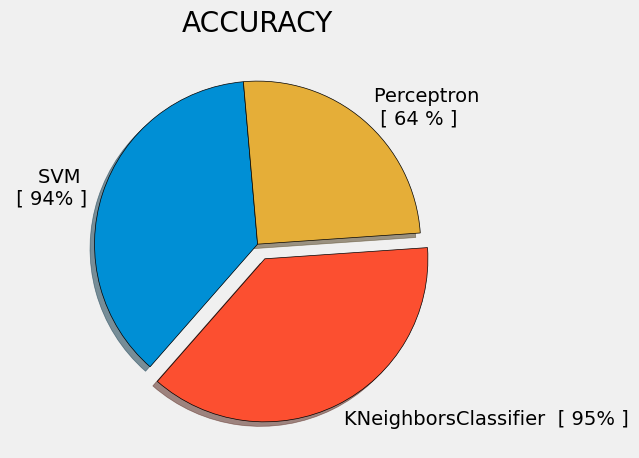

In [22]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

slices = [svc_score, knn_score, per_score]
labels = [f'SVM \n [ {svc_score}% ]',f'KNeighborsClassifier  [ {knn_score}% ]',f'Perceptron \n [ {per_score} % ]']
explode = [0,0.1, 0] #this puts an emphasis on python

plt.pie(slices, labels = labels, explode = explode,
        #shadow = True for asthetics to add a shadow to our plot
        shadow = True,
        #startangle = 90, rotates the original chart by 90 degress
        startangle = 95,
        wedgeprops = {'edgecolor': 'black'})



plt.title('ACCURACY')
plt.tight_layout()
plt.show()

In [23]:
import pickle
knn_filename = 'KNN.pkl'
# Open the file to save as pkl file
knn_Model_pkl = open(knn_filename, 'wb')
pickle.dump(knn, knn_Model_pkl)
# Close the pickle instances
knn_Model_pkl.close()